In [33]:
%load_ext autoreload
%autoreload 2
#%load_ext profila
from electron_scattering import Environment, propagate_photons
import numba
numba.set_num_threads(8)
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
central_wavelength = 5000 * u.AA
freq_fact = (central_wavelength.to(u.J, equivalencies=u.spectral())/c.c**2/c.m_e).si
env_obj = Environment(freq_fact=freq_fact)
energies, interactions = propagate_photons(n_pkts=int(1e6), env_obj=env_obj)
wavelengths = (energies * c.m_e * c.c**2).to(u.AA, equivalencies=u.spectral())
frequencies = (energies * c.m_e * c.c**2).to(u.Hz, equivalencies=u.spectral())

Text(0, 0.5, 'Counts')

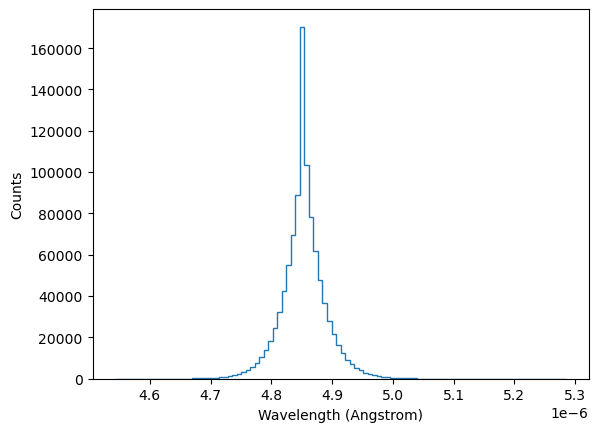

In [86]:
wl_edges = np.linspace(min(wavelengths), max(wavelengths), 100)
counts, _, _ = plt.hist(energies, bins=100, histtype='step');
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Counts')